/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


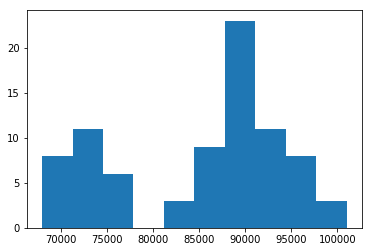

In [93]:
"""
Generate random data
"""
from collections import namedtuple
from random import random
from numpy.random import normal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Person = namedtuple('Person', ['income', 'v1', 'v2', 'v3', 'gender'])

def generate_income(n_low, n_high):
    """Generates a bimode
    """
    incomes = [int(normal(loc=72824, scale=2500) / 1000) * 1000 for i in range(n_low)]
    incomes.extend([int(normal(loc=90761, scale=4500) / 1000) * 1000 for i in range(n_high)])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(incomes)
    fig.show()
    
    np.random.shuffle(incomes)
    return incomes


def generate_person(income):
    v1 = (random() * income) / 100000.0
    v2 = round(random() - 0.5, 2)
    gender = 0 if random() < 0.3 else 1
    bonus = int(income * (random()/10 + 0.05 if gender == 0 else random()/10))
    return [income, bonus, int(v1 * 578), v2, gender]

people = [
    generate_person(income)
    for income in generate_income(int(83 * 0.3), int(83 * 0.7))
]

In [94]:
import pandas as pd

people_df = pd.DataFrame(people, columns=['Salary', 'Bonus', 'IRC Thank You Notes', 'Managerial Assessment', 'Gender'])
people_df

,Salary,Bonus,IRC Thank You Notes,Managerial Assessment,Gender
0,85000,948,134,-0.25,1
1,91000,1878,223,-0.25,1
2,95000,7353,239,0.38,0
3,95000,4167,72,-0.40,1
4,74000,8017,172,-0.46,0
5,68000,1163,253,-0.06,1
6,93000,13368,66,0.13,0
7,74000,943,369,-0.45,1
8,75000,10890,264,0.49,0
9,95000,6476,403,-0.19,0


In [97]:
people_df.to_csv('SupportingMaterialStudents/data/company_a_payroll.csv', index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


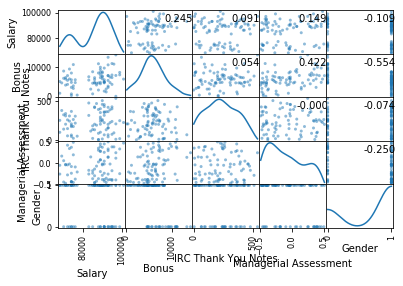

In [98]:
from pandas.tools.plotting import scatter_matrix
axes = scatter_matrix(people_df, alpha=0.5, diagonal='kde')
corr = people_df.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()